<a href="https://colab.research.google.com/github/Shivani11032006/Daily-work/blob/main/DecisionTreeIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_name = '/content/iris.csv'

In [4]:
import pandas as pd
iris = pd.read_csv(file_name)


In [5]:
iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [6]:
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [7]:
label_encoder = preprocessing.LabelEncoder()
iris['Species'] = label_encoder.fit_transform(iris['Species'])
iris['Species']

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [8]:
iris = iris.rename(columns={"Species":"Flowers_types"})

In [9]:
iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Flowers_types
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [10]:
x=iris.iloc[:,0:4]
x

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [11]:
y=iris['Flowers_types']
y

,Flowers_types
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [12]:
colnames = list(iris.columns)
colnames

['Unnamed: 0',
 'Sepal.Length',
 'Sepal.Width',
 'Petal.Length',
 'Petal.Width',
 'Flowers_types']

In [13]:
label = iris['Flowers_types']
label

,Flowers_types
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [15]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

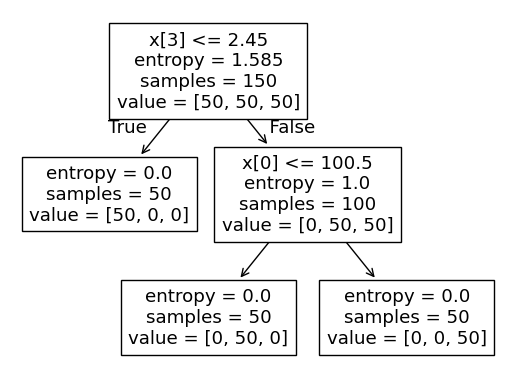

In [16]:
tree.plot_tree(model);

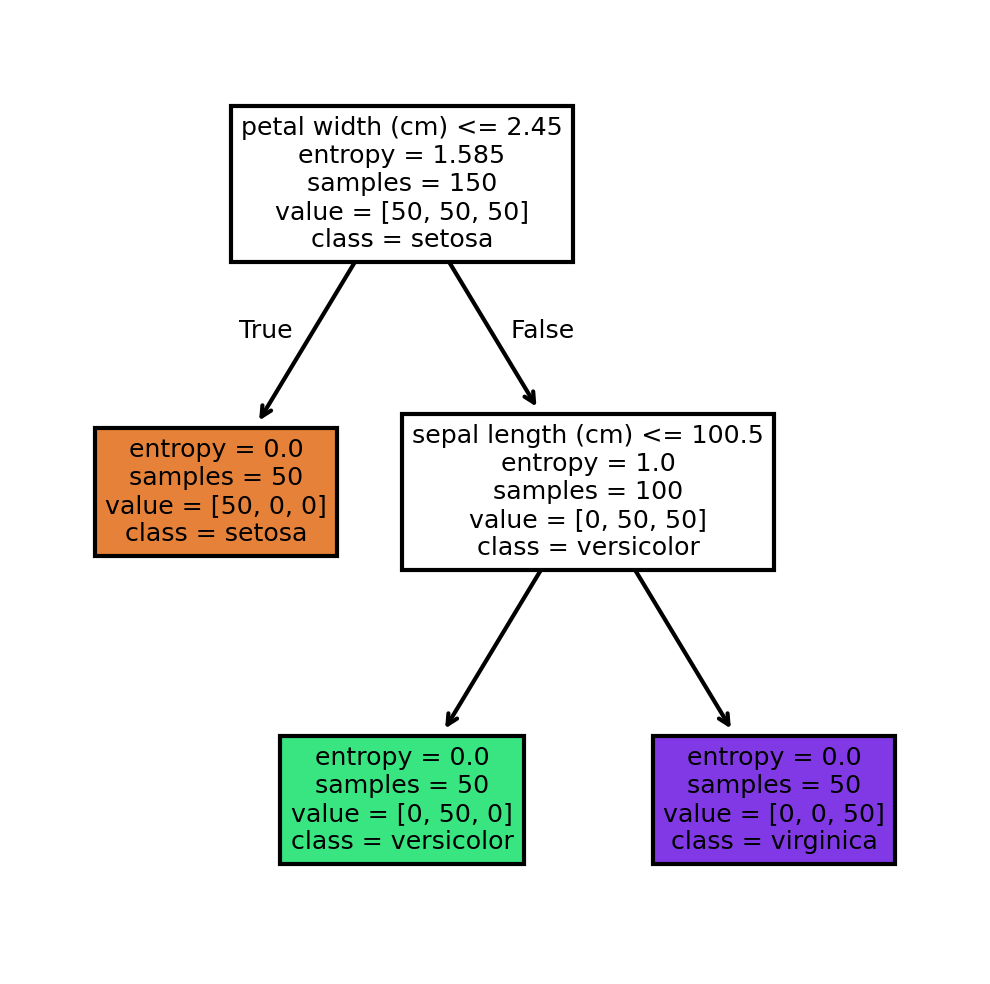

In [17]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [18]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

,count
1,12
2,10
0,8


In [19]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [20]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Flowers_types,,,
0,8,0,0
1,0,12,0
2,0,0,10


In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
array = iris.values
X = array[:,0:3]
Y = array[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [23]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [24]:
model.score(X_test,y_test)

0.9617261506075974